In [1]:
from IPython.display import display, HTML
from datetime import datetime

# Define the notebook title
Notebook_title = "SpaceX Landing Prediction"

# Get the current date
current_date = datetime.now().strftime("%B %d, %Y")

# Create the HTML string with title, date, and author
html_content = f"""
<h1 style="text-align:center;">{Notebook_title}</h1>
<br/>
<h3 style="text-align:left;">MikiasHWT</h3>
<h3 style="text-align:left;">{current_date}</h3>
"""

# Display the HTML content in the output
display(HTML(html_content))


# Prep Workplace

## Imports

In [2]:
import numpy as np
import pandas as pd
import os 
import requests
import datetime

# To show multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display all columns in a dataframe
pd.set_option("display.max_columns", None)
# Avoid truncating iformation in columns 
pd.set_option('display.max_colwidth', None)


## Directories

In [3]:
# Directories = {
#     "datDir": "path/",
#     "outDir": "path/"
# }

# # Data Directory
# datDir = ""

# # View data
# os.listdir(datDir)

# # Output Directory
# outDir = ""

# # View outputs
# os.listdir(outDir)

# # Define required directories
# Directories = {
#     "datDir": "path/to/data",
#     "outDir": "path/to/output"
# }

# # Create directories (if they don't exist) & list contents
# for folder, path in Directories.items():
#     os.makedirs(path, exist_ok=True) 
#     print(f"Contents of {path}:")
#     print("\n".join(os.listdir(path))) 

# **Part 1 : API Data Collection**

## Motivation
This project serves as the capstone for an online data science course I am currently undertaking. Its primary goal is to provide hands-on experience with common data science tasks, including data collection, cleaning, and analysis. The capstone focuses on predicting the successful landing of the Falcon 9 first stage, a critical factor in SpaceX's ability to reduce launch costs through reusability.

SpaceX advertises Falcon 9 launches at approximately $62 million, significantly lower than the $165 million charged by other providers, largely due to the reuse of the first stage. By analyzing the factors that influence a successful landing, this project explores how such insights could be applied in a competitive market context, where potential bidders might want to compete with SpaceX for launch contracts.

Through this capstone, I aim to refine my skills in data processing, API integration, and predictive modeling, bridging the gap between theoretical knowledge and real-world applications in the field of data science.

## Objectives
Make a get request to the SpaceX API. Perform basic data wrangling and formating. 

- Request to the SpaceX API
- Clean the requested data

## Data Source

## Define API Functions
This section defines functions to retrieve and process data using the SpaceX API, which provides structured access to information on rockets, payloads, cores, and launch sites. APIs (Application Programming Interfaces) enable streamlined data collection by specifying inputs (such as unique identifiers for rockets or payloads) and returning structured outputs (JSON responses with relevant details).

Each function in this section is designed to handle a specific type of data:

    Inputs: Unique identifiers (e.g., rocket IDs, payload IDs, launchpad IDs) from the dataset.
    Outputs: Parsed attributes such as rocket names, payload masses, launch site coordinates, and landing outcomes.

The functions ensure that outputs are formatted consistently and handle missing or incomplete data gracefully. This structured approach ensures the dataset is comprehensive and properly formatted for subsequent analysis and modeling.

In [4]:
# def fetch_data(url, identifier):
#     """
#     Fetch data from a given URL and identifier using the SpaceX API.
    
#     Args:
#         url (str): Base URL of the API endpoint.
#         identifier (str): Specific identifier for the API resource.
    
#     Returns:
#         dict: JSON response from the API or an empty dictionary in case of failure.
#     """
#     try:
#         response = requests.get(f"{url}/{identifier}")
#         response.raise_for_status()  # Raise an error for bad HTTP responses
#         return response.json()
#     except requests.RequestException as e:
#         print(f"Error fetching data for ID {identifier}: {e}")
#         return {}

# def getBoosterVersion(data):
#     """
#     Fetch booster version names for each rocket ID in the dataset.

#     Args:
#         data (DataFrame): Dataset containing a 'rocket' column with rocket IDs.
    
#     Returns:
#         list: List of booster version names.
#     """
#     booster_versions = []
#     for rocket_id in data['rocket']:
#         if rocket_id:  # Check if the rocket ID is not null
#             rocket_data = fetch_data("https://api.spacexdata.com/v4/rockets", rocket_id)
#             booster_versions.append(rocket_data.get('name', 'Unknown'))  # Default to 'Unknown' if name is missing
#         else:
#             booster_versions.append(None)
#     return booster_versions

# def getLaunchSite(data):
#     """
#     Fetch launch site details (longitude, latitude, and name) for each launchpad ID in the dataset.

#     Args:
#         data (DataFrame): Dataset containing a 'launchpad' column with launchpad IDs.
    
#     Returns:
#         tuple: Three lists containing longitudes, latitudes, and launch site names.
#     """
#     longitudes, latitudes, launch_sites = [], [], []
#     for launchpad_id in data['launchpad']:
#         if launchpad_id:  # Check if the launchpad ID is not null
#             launchpad_data = fetch_data("https://api.spacexdata.com/v4/launchpads", launchpad_id)
#             longitudes.append(launchpad_data.get('longitude'))
#             latitudes.append(launchpad_data.get('latitude'))
#             launch_sites.append(launchpad_data.get('name', 'Unknown'))
#         else:
#             longitudes.append(None)
#             latitudes.append(None)
#             launch_sites.append(None)
#     return longitudes, latitudes, launch_sites

# def getPayloadData(data):
#     """
#     Fetch payload details (mass and orbit) for each payload ID in the dataset.

#     Args:
#         data (DataFrame): Dataset containing a 'payloads' column with payload IDs.
    
#     Returns:
#         tuple: Two lists containing payload masses and orbit types.
#     """
#     payload_masses, orbits = [], []
#     for payload_id in data['payloads']:
#         if payload_id:  # Check if the payload ID is not null
#             payload_data = fetch_data("https://api.spacexdata.com/v4/payloads", payload_id)
#             payload_masses.append(payload_data.get('mass_kg'))
#             orbits.append(payload_data.get('orbit', 'Unknown'))
#         else:
#             payload_masses.append(None)
#             orbits.append(None)
#     return payload_masses, orbits

# def getCoreData(data):
#     """
#     Fetch core details (block, reuse count, serial, and other attributes) for each core in the dataset.

#     Args:
#         data (DataFrame): Dataset containing a 'cores' column with core information.
    
#     Returns:
#         tuple: Lists containing core attributes such as block, reuse count, serial, etc.
#     """
#     blocks, reused_counts, serials, outcomes, flights, gridfins, reused, legs, landing_pads = (
#         [], [], [], [], [], [], [], [], []
#     )
#     for core in data['cores']:
#         if core['core']:  # Check if the core ID exists
#             core_data = fetch_data("https://api.spacexdata.com/v4/cores", core['core'])
#             blocks.append(core_data.get('block'))
#             reused_counts.append(core_data.get('reuse_count'))
#             serials.append(core_data.get('serial'))
#         else:
#             blocks.append(None)
#             reused_counts.append(None)
#             serials.append(None)
        
#         # Append other core-specific details
#         outcomes.append(f"{core.get('landing_success', 'Unknown')} {core.get('landing_type', 'Unknown')}")
#         flights.append(core.get('flight'))
#         gridfins.append(core.get('gridfins'))
#         reused.append(core.get('reused'))
#         legs.append(core.get('legs'))
#         landing_pads.append(core.get('landpad'))
#     return blocks, reused_counts, serials, outcomes, flights, gridfins, reused, legs, landing_pads


Below we will define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the <code>rocket</code> column we would like to learn the booster name.

In [5]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.

In [6]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [7]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.


In [8]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

## Fetch Data

In [9]:
# Static JSON URL in case of API failure
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

try:
    # Try to fetch data from the SpaceX API
    spacex_url = "https://api.spacexdata.com/v4/launches/past"  # Define SpaceX API endpoint
    response = requests.get(spacex_url)  
    response.raise_for_status()  # Ensure the response is successful
    data = response.json()  # Decode the response content as JSON
    print("Successfully fetched data from the SpaceX API.")
except requests.RequestException:
    # Use the static JSON URL if the API call fails
    print("API call failed. Using static JSON data instead.")
    data = pd.read_json(static_json_url)

# Normalize the JSON data into a Pandas DataFrame
df = pd.json_normalize(data)

Successfully fetched data from the SpaceX API.


In [10]:
# Data Dimensions
print(f"The dataset contains {df.shape[0]} observations and {df.shape[1]} features.\n")

# Broad information on features
print(df.info(), "\n")

# First 5 observations
df.head()

The dataset contains 187 observations and 43 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        187 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     187 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   187 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       187 non-null    object 
 9   ships                      187 non-null    object 
 10  capsules                   187 non-null    object 
 11  payloads                   187 non-null    object 
 12  launchpad                  187 non-null    object 

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

## Subset & Wrangle Data

The raw dataset contains information that is either irrelevant to our analysis or stored in formats that are not directly usable. For instance, several features include nested lists, redundant data, or identification numbers that cannot be directly interpreted. To make the dataset analysis-ready, we will refine the data by focusing on relevant features, flattening nested structures, and applying necessary filters.

The steps include:

1. **Subsetting the Data**:
   - Retain only the columns necessary for our analysis: `rocket`, `payloads`, `launchpad`, `cores`, `flight_number`, and `date_utc`.

2. **Filtering**:
   - Remove rows with multiple cores or payloads, which correspond to Falcon rockets with additional boosters or multiple payloads not relevant to our study.

3. **Flattening Nested Lists**:
   - The `payloads` and `cores` columns are formatted as lists. We will extract the single value from these lists for easier analysis.

4. **Date Conversion**:
   - Convert the `date_utc` column to a datetime datatype and extract only the date to simplify temporal analysis.

5. **Restricting Launch Dates**:
   - Include only launches that occurred on or before November 13, 2020, to ensure consistency with course materials. 

6. **Enhancing Usability with API Functions**:
   - Use predefined API functions to replace ID numbers in features such as `rocket`, `payloads`, and `cores` with meaningful information, making the data more interpretable.

By addressing these issues, we transform the dataset into a streamlined, structured, and interpretable format. This ensures it is clean, consistent, and ready for detailed analysis in subsequent steps.

Additionally we will: 
- Filter the dataset to only include Falcon 9 launches, eliminating Falcon 1 data. 
- Reset FlightNumber columns 
- Deal with missing values
- Save final output

In [11]:
# Subset the DataFrame to include only relevant columns
filtered_data = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove rows with multiple cores or multiple payloads
filtered_data = filtered_data[filtered_data['cores'].map(len) == 1]
filtered_data = filtered_data[filtered_data['payloads'].map(len) == 1]

# Extract single values from the cores and payloads lists
filtered_data['cores'] = filtered_data['cores'].map(lambda x: x[0])
filtered_data['payloads'] = filtered_data['payloads'].map(lambda x: x[0])

# Convert date_utc to a datetime object and extract only the date
filtered_data['date'] = pd.to_datetime(filtered_data['date_utc']).dt.date

# Filter launches to include only those on or before November 13, 2020
filtered_data = filtered_data[filtered_data['date'] <= datetime.date(2020, 11, 13)]

In [17]:
filtered_data.dtypes

rocket           object
payloads         object
launchpad        object
cores            object
flight_number     int64
date_utc         object
date             object
dtype: object

In [13]:
# Global variables for API data conversion
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [14]:
# Call getBoosterVersion
getBoosterVersion(filtered_data)
BoosterVersion[0:5]

# Call getLaunchSite
getLaunchSite(filtered_data)
LaunchSite[0:5]

# Call getPayloadData
getPayloadData(filtered_data)
PayloadMass[0:5]

# Call getCoreData
getCoreData(filtered_data)

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

['Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'CCSFS SLC 40']

[20, None, 165, 200, None]

In [18]:
# Create dictionary with newly retrieved information
launch_dict = {'FlightNumber': list(filtered_data['flight_number']),
'Date': list(filtered_data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [19]:
# Confirm proper data retrival
for key, value in launch_dict.items():
    print(f"{key}: {len(value)}")


FlightNumber: 94
Date: 94
BoosterVersion: 94
PayloadMass: 94
Orbit: 94
LaunchSite: 94
Outcome: 94
Flights: 94
GridFins: 94
Reused: 94
Legs: 94
LandingPad: 94
Block: 94
ReusedCount: 94
Serial: 94
Longitude: 94
Latitude: 94


In [20]:
# Convert dictionary to dataframe
launch_df = pd.DataFrame(launch_dict)

In [21]:
# Inspect data
launch_df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [22]:
# Filter the DataFrame for rows where BoosterVersion is "Falcon 9"
falcon9_df = launch_df[launch_df["BoosterVersion"] == "Falcon 9"]

# Reset FlightNumber column values
falcon9_df.loc[:, 'FlightNumber'] = list(range(1, falcon9_df.shape[0] + 1))

# Set FlightNumber as the index
falcon9_df.set_index('FlightNumber', inplace=True)

falcon9_df.head()

,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
FlightNumber,,,,,,,,,,,,,,,,
1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [23]:
# Count missing values
print("LandingPad column contains 'None' values for launches where a landing pads was not used.")
falcon9_df.isnull().sum()

print("The remaining features (ie: PayloadMass) should not contain missing values. ")

LandingPad column contains 'None' values for launches where a landing pads was not used.


Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

The remaining features (ie: PayloadMass) should not contain missing values. 


In [24]:
# Impute missing PayloadMass values with the mean using .loc[]
falcon9_df.loc[:, "PayloadMass"] = falcon9_df["PayloadMass"].fillna(falcon9_df["PayloadMass"].mean()).round(1)

# Check missing values
print("Missing values after imputing PayloadMass:")
falcon9_df.isnull().sum()

Missing values after imputing PayloadMass:


Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

## Export Data

In [25]:
# Save data as csv
falcon9_df.to_csv('dataset_part_1.csv')

# **Part 2: Webscraping Data**


## Motivation
Perform webscrapping to collect Falcon 9 historical launch records from Wikipedia pages titled `List of Falcon 9 and Falcon Heavy launches`

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches

## Objectives
Web scrap Falcon 9 launch records with `BeautifulSoup`: 
- Extract a Falcon 9 launch records from HTML table in Wikipedia
- Parse the table and convert it into a Pandas data frame

## Import libraries

In [26]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

## Define Web Scrapping Functions

In [27]:
# def date_time(table_cells):
#     """
#     Extracts the date and time from an HTML table cell.
    
#     Input:
#         table_cells: A BeautifulSoup object representing a table cell.
    
#     Output:
#         A list containing the first two strings (date and time).
#     """
#     return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

# def booster_version(table_cells):
#     """
#     Extracts the booster version from an HTML table cell.
    
#     Input:
#         table_cells: A BeautifulSoup object representing a table cell.
    
#     Output:
#         A string representing the booster version.
#     """
#     out = ''.join([booster_version for i, booster_version in enumerate(table_cells.strings) if i % 2 == 0][0:-1])
#     return out

# def landing_status(table_cells):
#     """
#     Extracts the landing status from an HTML table cell.
    
#     Input:
#         table_cells: A BeautifulSoup object representing a table cell.
    
#     Output:
#         A string representing the landing status.
#     """
#     out = [i for i in table_cells.strings][0]
#     return out

# def get_mass(table_cells):
#     """
#     Extracts the mass (in kilograms) from an HTML table cell.
    
#     Input:
#         table_cells: A BeautifulSoup object representing a table cell.
    
#     Output:
#         A string representing the mass or `0` if no mass is found.
#     """
#     mass = unicodedata.normalize("NFKD", table_cells.text).strip()
#     if mass:
#         new_mass = mass[0:mass.find("kg") + 2]
#     else:
#         new_mass = 0
#     return new_mass

# def extract_column_from_header(row):
#     """
#     Extracts and cleans the column name from a header row.
    
#     Input:
#         row: A BeautifulSoup object representing a table header row.
    
#     Output:
#         A cleaned string representing the column name.
#     """
#     if row.br:
#         row.br.extract()
#     if row.a:
#         row.a.extract()
#     if row.sup:
#         row.sup.extract()
    
#     column_name = ' '.join(row.contents).strip()
    
#     # Filter out digits and empty names
#     if not column_name.isdigit():
#         return column_name


In [28]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


In [29]:
# Define static Wiki page for consistency. 
static_wiki_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

# Check URL and inspect page content

In [30]:
# Send a GET request to the page
response = requests.get(static_wiki_url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

Successfully fetched the webpage!


In [31]:
# Parse the page content 
soup = BeautifulSoup(response.content, 'html.parser')

# Print page title
print(soup.title)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [32]:
# Find all tables in wiki page
html_tables = soup.find_all("table")

In [33]:
# Note our table of interest is the 3rd element
launch_table = html_tables[2]

print(launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [34]:
# Initiate list to store column names
column_names = []

# Find all <th> elements in the launch table 
header_elements = launch_table.find_all('th')

# Extract column names using extract_column_from_header function
for header in header_elements:
    column_name = extract_column_from_header(header)  # Apply the function
    if column_name is not None and len(column_name) > 0:  # Check for non-empty names
        column_names.append(column_name)  # Append to the list

# Display the extracted column names
print(column_names)


['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [35]:
launch_dict2= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict2['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict2['Flight No.'] = []
launch_dict2['Launch site'] = []
launch_dict2['Payload'] = []
launch_dict2['Payload mass'] = []
launch_dict2['Orbit'] = []
launch_dict2['Customer'] = []
launch_dict2['Launch outcome'] = []
# Added some new columns
launch_dict2['Version Booster']=[]
launch_dict2['Booster landing']=[]
launch_dict2['Date']=[]
launch_dict2['Time']=[]

In [36]:
extracted_row = 0

# Extract each table
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    # Get table rows
    for rows in table.find_all("tr"):
        # Check if the first table heading is a number corresponding to a flight number
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
            else:
                flag = False
        else:
            flag = False

        # Get table cells
        row = rows.find_all('td')

        # If it is a valid flight number, save data into `launch_dict`
        if flag:
            extracted_row += 1

            # Append flight number
            launch_dict2['Flight No.'].append(flight_number)

            # Extract and append date and time
            datatimelist = date_time(row[0])
            date = datatimelist[0].strip(',')
            time = datatimelist[1]
            launch_dict2['Date'].append(date)
            launch_dict2['Time'].append(time)

            # Append booster version
            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string
            launch_dict2['Version Booster'].append(bv)

            # Append launch site
            launch_site = row[2].a.string
            launch_dict2['Launch site'].append(launch_site)

            # Append payload
            payload = row[3].a.string
            launch_dict2['Payload'].append(payload)

            # Append payload mass
            payload_mass = get_mass(row[4])
            launch_dict2['Payload mass'].append(payload_mass)

            # Append orbit
            orbit = row[5].a.string
            launch_dict2['Orbit'].append(orbit)

            # Append customer
            customer = row[6].text.strip()
            launch_dict2['Customer'].append(customer)

            # Append launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict2['Launch outcome'].append(launch_outcome)

            # Append booster landing
            booster_landing = landing_status(row[8])
            launch_dict2['Booster landing'].append(booster_landing)

# Display the number of rows extracted
print(f"Number of rows extracted: {extracted_row}")


Number of rows extracted: 121


In [37]:
launch_df2= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict2.items()})

launch_df2.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA (COTS)\nNRO,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA (COTS),Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA (CRS),Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA (CRS),Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


## Export Scrapped Data

In [38]:
launch_df2.to_csv('spacex_web_scraped.csv', index=False)

# **Part 3: Data Wrangling**

In this section, we will conduct Exploratory Data Analysis (EDA) to identify patterns in the dataset and determine suitable labels for training supervised machine learning models.

## Motivation

The dataset contains various scenarios related to the success or failure of Falcon 9 booster landings. These outcomes are categorized based on the type and location of the landing:
- **Ocean Landings**:
  - `True Ocean`: The booster successfully landed in a designated ocean region.
  - `False Ocean`: The booster failed to land in a designated ocean region.
- **Ground Pad Landings (RTLS)**:
  - `True RTLS`: The booster successfully landed on a ground pad.
  - `False RTLS`: The booster failed to land on a ground pad.
- **Drone Ship Landings (ASDS)**:
  - `True ASDS`: The booster successfully landed on a drone ship.
  - `False ASDS`: The booster failed to land on a drone ship.

To simplify these categories for modeling purposes, we will convert the outcomes into binary training labels:
- `1`: Indicates a successful booster landing.
- `0`: Indicates an unsuccessful booster landing.

This transformation ensures that the data is properly formatted for training supervised machine learning models.

## Objectives

Perform exploratory  Data Analysis and determine Training Labels 

- Exploratory Data Analysis
- Determine Training Labels 

In [39]:
# We will load premade data for consistence. 
df3=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df3.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [40]:
# Missing Values
df3.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [41]:
# Data types
df3.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


In [42]:
# Determine number of launches by site
df3["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Orbit Definitions

- **LEO**: Low Earth Orbit (< 2,000 km altitude). Most man-made objects in space are here.

- **VLEO**: Very Low Earth Orbit (< 450 km). Ideal for Earth observation spacecraft.

- **GTO**: Geosynchronous Transfer Orbit (~35,786 km). Matches Earth's rotation for weather, communication, and surveillance.

- **SSO/SO**: Sun-Synchronous Orbit. Polar orbit allowing satellites to pass over the same point at the same solar time.

- **ES-L1**: Lagrange Point 1 between the Sun and Earth, where gravitational forces balance.

- **HEO**: Highly Elliptical Orbit with high eccentricity.

- **ISS**: International Space Station. Modular station in LEO involving NASA, Roscosmos, JAXA, ESA, and CSA.

- **MEO**: Medium Earth Orbit (2,000–35,786 km). Often at ~20,200 km with 12-hour orbital periods.

- **GEO**: Geostationary Orbit. Circular orbit at ~35,786 km altitude, aligned with Earth's rotation.

- **PO**: Polar Orbit. Passes over Earth's poles with nearly vertical paths.


In [43]:
# Determine orbit destination counts 
df3["Orbit"].value_counts()

# Consider pooling SSO & SO

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

- **True Ocean**: The booster successfully landed in a designated ocean region.  
- **False Ocean**: The booster failed to land in a designated ocean region.  
- **True RTLS**: The booster successfully landed on a ground pad.  
- **False RTLS**: The booster failed to land on a ground pad.  
- **True ASDS**: The booster successfully landed on a drone ship.  
- **False ASDS**: The booster failed to land on a drone ship.  
- **None ASDS** / **None None**: Indicates a failure to land.

In [44]:
# Determine counts of landing outcomes
landing_outcomes = df3["Outcome"].value_counts()

landing_outcomes

# Consider pooling "None ASDS" & "None None"

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

We will define a "Landing Class" variable to simply the outcomes column.
- 1 = Success
- 0 = failure

In [45]:
# Define bad outcomes as a set
bad_outcomes = {"None ASDS", "None None", "False ASDS", "False RTLS", "False Ocean"}

# Assign landing_class as a new column using numpy
df3['Class'] = np.where(df3["Outcome"].isin(bad_outcomes), 0, 1)

# Display 
df3[['Outcome', 'Class']].head(10)



,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
5,None None,0
6,True Ocean,1
7,True Ocean,1
8,None None,0
9,None None,0


In [46]:
# Determine success rate
print(f"There was a {((df3['Class'].mean())*100).round(2)}% landing success rate")

There was a 66.67% landing success rate


## Export Data

In [47]:
df3.to_csv("dataset_part_2.csv", index=False)

# **Part 4: EDA SQL**

## Objective
1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 

## Import libraries

In [48]:
%load_ext sql

In [49]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [50]:
%sql sqlite:///my_data1.db

In [51]:
# Import Data
df4 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df4.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [52]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [53]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [54]:
# Display unique launch sites
%sql SELECT DISTINCT Launch_Site FROM SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [55]:
# Display 5 records where launch site begins with 'CCA'
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [56]:
# Display the total payload mass carried by boosters launched by NASA (CRS)
%sql SELECT SUM(PAYLOAD_MASS__KG_) AS Total_Payload_Mass FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)'


 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


In [57]:
# Display average payload mass carried by booster version F9 v1.1
%sql SELECT AVG(PAYLOAD_MASS__KG_) AS Average_Payload_Mass FROM SPACEXTABLE WHERE Booster_Version LIKE 'F9 v1.1%'

 * sqlite:///my_data1.db
Done.


Average_Payload_Mass
2534.6666666666665


In [58]:
# List the date when the first successfull landing outcome in ground pad was achieved
%sql SELECT Date FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (ground pad)' LIMIT 1


 * sqlite:///my_data1.db
Done.


Date
2015-12-22


In [59]:
# List the names of the booster which have sucess in drone ship and had a payload mass greater than 4000 but less than 6000
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [60]:
# List the total number of success and failure mission outcomes
%sql SELECT Mission_Outcome, COUNT(*) AS Total_Missions FROM SPACEXTABLE GROUP BY Mission_Outcome

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Missions
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [61]:
# List the names of the booster_versions which have carried the maximum payload mass (Using a subquery)
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTABLE)

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [62]:
# List the records which will display the month names, failure landing_outcomes in drone ships, booster versions, launch_site for the months in year 2015

%sql SELECT strftime('%m', DATE) AS Month_Number, strftime('%Y', DATE) AS Year, Landing_Outcome, Booster_Version, Launch_Site FROM SPACEXTABLE WHERE Landing_Outcome = 'Failure (drone ship)' AND strftime('%Y', DATE) = '2015'

 * sqlite:///my_data1.db
Done.


Month_Number,Year,Landing_Outcome,Booster_Version,Launch_Site
01,2015,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,2015,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [63]:
# Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
%sql SELECT Landing_Outcome, COUNT(*) AS Outcome_Count FROM SPACEXTABLE WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY Landing_Outcome ORDER BY Outcome_Count DESC

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


# **Part 5: EDA Visualization**

## Objectives 
Perform exploratory data analysis and feature engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data Feature Engineering

## Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df5 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df5.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


We will first explore the variables `FlightNumber`, `PayloadMass` and `Class` (a variable we included to simplify the `Outcome` feature.)

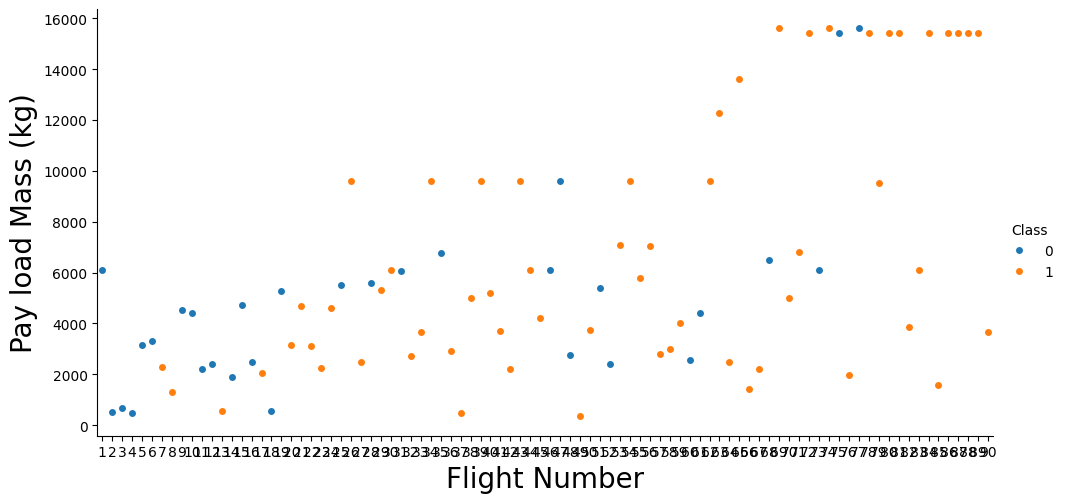

In [82]:
# Categorical plot
sns.catplot(df5, y="PayloadMass", x="FlightNumber", hue="Class", aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show();

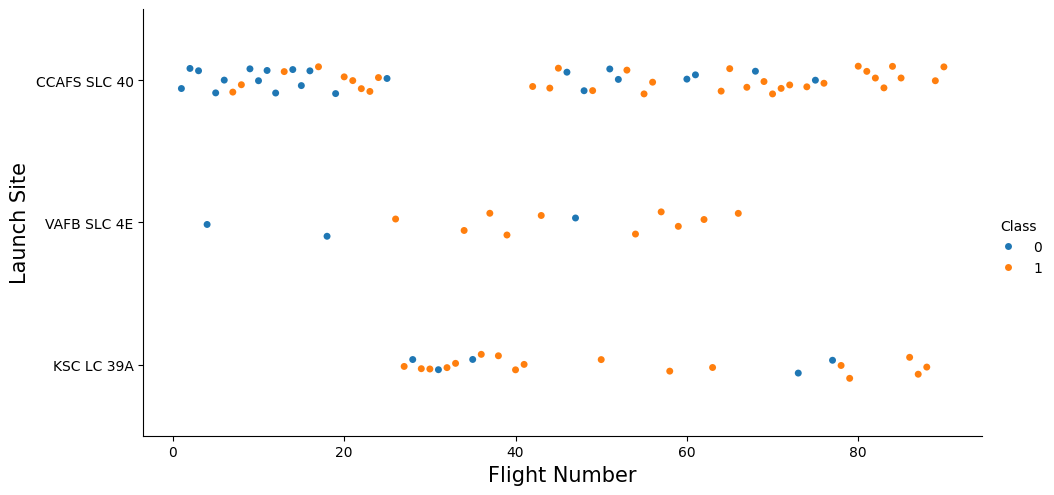

In [85]:
# Categorical plot of FlightNumber, Launchsite and Outcome
sns.catplot(df5, x="FlightNumber", y="LaunchSite", hue="Class", aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show();

In [90]:
# Determine Class variable by Launch Site
df5.groupby("LaunchSite")["Class"].mean()

# Number of attempts by Launch Site
df5["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

With the combination of the plot and the exploratory code, we can tell that the number of launches vary by site. Additionally it seems that CCAFS site has a lower success rate than the two other launch sites. This may be attributed to the fact that there have been many more launches from that site than the two others . 

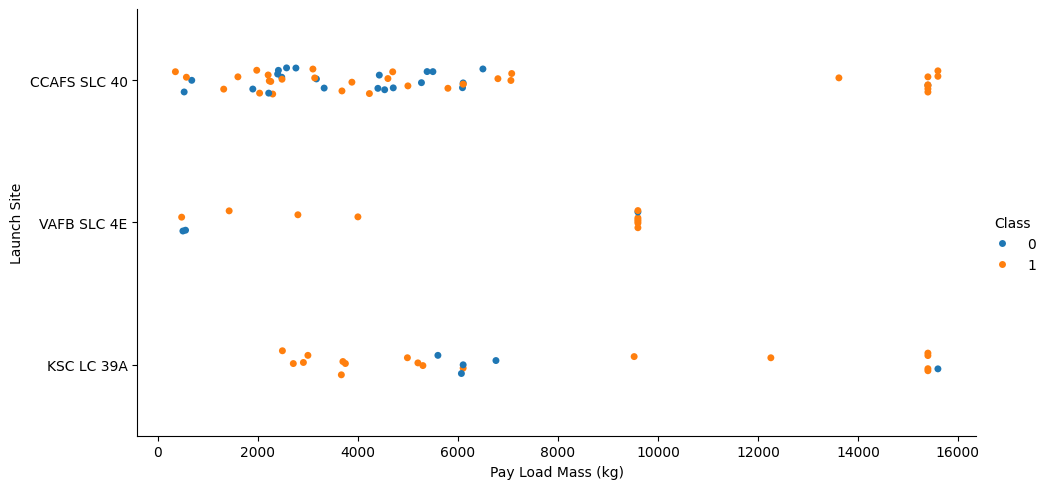

In [94]:
# Visualize Payload Mass by Launch Site
sns.catplot(df5, x="PayloadMass", y="LaunchSite", hue="Class", aspect=2)
plt.xlabel("Pay Load Mass (kg)")
plt.ylabel("Launch Site")
plt.show();

There appears to be a 10,000kg limit on launches from VAFB SLC 4E Launch site. 

Orbit Definitions Reminder

- **LEO**: Low Earth Orbit (< 2,000 km altitude). Most man-made objects in space are here.

- **VLEO**: Very Low Earth Orbit (< 450 km). Ideal for Earth observation spacecraft.

- **GTO**: Geosynchronous Transfer Orbit (~35,786 km). Matches Earth's rotation for weather, communication, and surveillance.

- **SSO/SO**: Sun-Synchronous Orbit. Polar orbit allowing satellites to pass over the same point at the same solar time.

- **ES-L1**: Lagrange Point 1 between the Sun and Earth, where gravitational forces balance.

- **HEO**: Highly Elliptical Orbit with high eccentricity.

- **ISS**: International Space Station. Modular station in LEO involving NASA, Roscosmos, JAXA, ESA, and CSA.

- **MEO**: Medium Earth Orbit (2,000–35,786 km). Often at ~20,200 km with 12-hour orbital periods.

- **GEO**: Geostationary Orbit. Circular orbit at ~35,786 km altitude, aligned with Earth's rotation.

- **PO**: Polar Orbit. Passes over Earth's poles with nearly vertical paths.

,Orbit,mean,count
0,GTO,0.518519,27
1,ISS,0.619048,21
2,VLEO,0.857143,14
3,PO,0.666667,9
4,LEO,0.714286,7
5,SSO,1.000000,5
6,MEO,0.666667,3
7,GEO,1.000000,1
8,ES-L1,1.000000,1
9,HEO,1.000000,1


<Axes: xlabel='Orbit', ylabel='mean'>

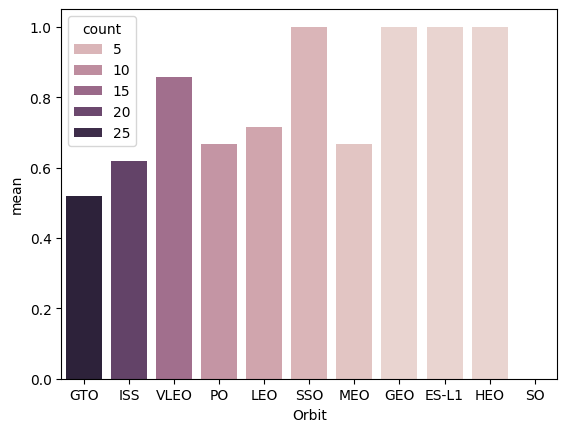

In [110]:
# Visualize Orbit and Class features
Orbital_Success = df5.groupby("Orbit")["Class"].agg(['mean', 'count']).sort_values(by='count', ascending=False).reset_index()

Orbital_Success

# Barplot with counts as Hue
sns.barplot(Orbital_Success, x="Orbit", y="mean", hue="count")

We can see that as the attempts for a certain orbital destination increase, its success rate generally drops. That being said, VLEO appears to have retained a fairly high success rate at 85% with 14 attempts made. 

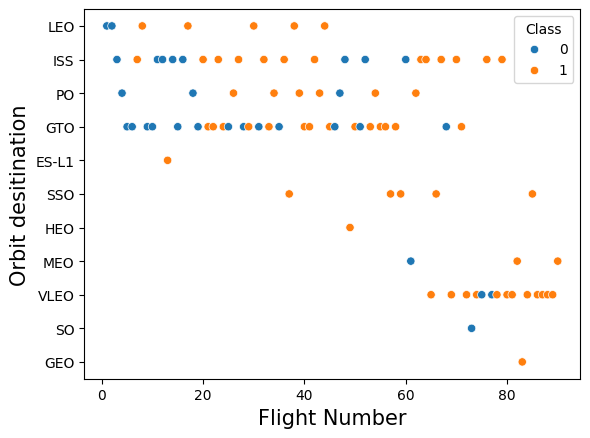

In [111]:
# Visualize FlightNumber and Orbit 
sns.scatterplot(df5, x="FlightNumber", y="Orbit", hue="Class")
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit desitination", fontsize=15)
plt.show();

There appears to be a increase in success rate for some of the orbit desintations such as LEO, while other destinations appear to experiance the periodic failure despite number of attempts. There is also a pattern of diversifying orbit destinations over time. 

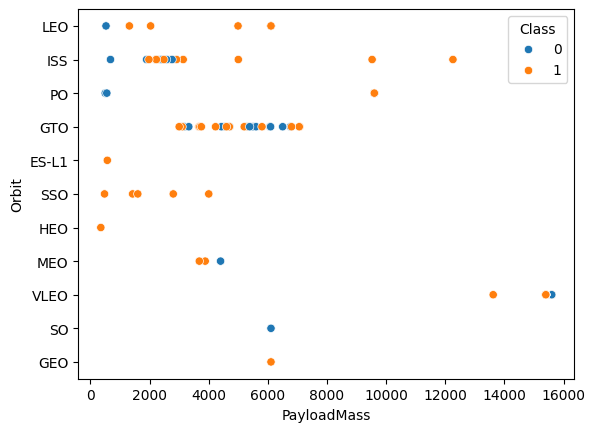

In [ ]:
# Visualize Payload by Orbit
#sns.scatterplot(df5, x="PayloadMass", y="Orbit", hue="Class");

In [ ]:
# Convert Date to datetime format
df5["Date"]=pd.to_datetime(df5["Date"], format="%Y-%m-%d", errors="coerce")

# Extract year information from date
df5["Year"] = df5["Date"].dt.year

In [ ]:
# Aggregate success by year
yearly_success = df5.groupby("Year")["Class"].mean().reset_index()

In [124]:
yearly_success

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


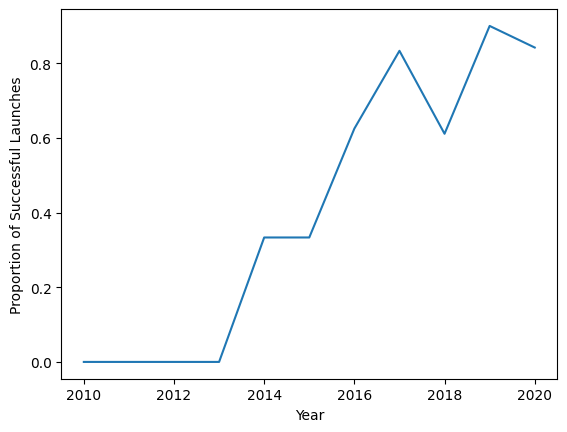

In [128]:
# Lineplot
sns.lineplot(yearly_success, x="Year", y="Class")
plt.ylabel("Proportion of Successful Launches")
plt.show();

We can see a increase in success rate starting in 2013. Some stable period and reduction in successful attempts are seen later on. 

## Feature Engineering
Now that we have explored the relationship between a few of the featues, we can begin applying feature engineering principles to select (or create) the varibles that we believe will produce a good machine learning model.

In [129]:
# Select features
features = df5[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [130]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

Most machine learning models require numerical features, therefor we will need to encode out categorical variables with dummy variables usuing OneHotEncoder. 

In [ ]:
# extract categorical variables
categorical_features = features.select_dtypes(include="object").columns

# Encode
features_one_hot = pd.get_dummies(features, columns=categorical_features)

features_one_hot.head() # Not sure why encoding resulted in boolean values

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
# Cast all variables to float64
features_one_hot = features_one_hot.astype(float)
features_one_hot.dtypes
features_one_hot.head()
features_one_hot.shape

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(90, 80)

## Export Data

In [142]:
features_one_hot.to_csv('dataset_part_5.csv', index=False)

# **Part 6: Map Visualization**
Launch success rates can be influenced by factors like payload mass, orbit type, and the location of launch sites. Analyzing existing launch site locations may reveal insights into how proximity and position impact rocket trajectories and success. We will use `Folium` to explore that aspect of the dataset. 

## Objectives
Search for geographic patterns between launch sites and success rates. 
- Mark all launch sites on a map
- Mark the successful/failed launches for each site on the map. 
- Calculate the distance between a launch site and neighboring locations

## Import Libraries

In [145]:
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
import wget
import pandas as pd

In [148]:
# Import spaceX dataset with Longitude and Latitude augmented data
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')

# read into a df
spacex_df=pd.read_csv(spacex_csv_file)

spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouère cheese",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [150]:
# Subset to relevant columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Group by launch site
launch_sites_df = spacex_df.groupby(["Launch Site"], as_index=False).first()

# Subet further
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [ ]:
# Create Folium map object with Houston Texas (NASA) as the initial center location. 
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

site_map

In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle).add_child(marker)

In [171]:
# # Initiate map
# nasa_coordinate = [29.559684888503615, -95.0830971930759]
# site_map = folium.Map(location=nasa_coordinate, zoom_start=4) 

# # Create a list to hold all the map elements
# map_elements = []

# # Create markers for each launch site
# for _, row in launch_sites_df.iterrows():
#     site_name = row["Launch Site"]
#     coordinate = (row['Lat'], row['Long'])

#     # Create a circle
#     circle = folium.Circle(
#         coordinate,
#         radius=1000, 
#         color="#d35500", 
#         fill=True
#     ).add_child(folium.Popup(site_name))
    
#     # Create a marker
#     marker = folium.map.Marker(
#         coordinate, 
#         icon=DivIcon(
#             icon_size=(20,20), 
#             icon_anchor=(0,0), 
#             html=f'<div style="font-size: 12; color:#d35400;"><b>{site_name}</b></div>'
#         )
#     )
    
#     # Append the circle and marker to the list
#     map_elements.append(circle)
#     map_elements.append(marker)

# # Add all elements to the map at once
# for element in map_elements:
#     site_map.add_child(element)

# # Display the map
# site_map



In [175]:
# Fewer map outputs in jupyter when using a function instead of a for loop only
# Initiate the map
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=3)

# Function to add markers and circles for all launch sites
def add_launch_sites_to_map(map_object, launch_sites_df):
    for _, row in launch_sites_df.iterrows():
        site_name = row["Launch Site"]
        coordinate = (row['Lat'], row['Long'])

        # Create a circle
        circle = folium.Circle(
            location=coordinate,
            radius=1000,
            color="#d35500",
            fill=True,
        ).add_child(folium.Popup(site_name))

        # Create a marker
        marker = folium.map.Marker(
            location=coordinate,
            icon=DivIcon(
                icon_size=(20, 20),
                icon_anchor=(0, 0),
                html=f'<div style="font-size: 12; color:#d35400;"><b>{site_name}</b></div>'
            )
        )

        # Add elements to the map object directly
        map_object.add_child(circle)
        map_object.add_child(marker)

# Call the function to add launch sites
add_launch_sites_to_map(site_map, launch_sites_df)

# Define the coordinates for the equator line
equator_coordinates = [[0, -180], [0, 180]]

# Add the equator line to the existing map
folium.PolyLine(
    locations=equator_coordinates,
    color="blue",
    weight=2,
    opacity=0.6,
).add_to(site_map)

# Display map
site_map

From the map we can tell that all the launch sites are very close to the coast, and seem to favor the american coasts that are closest to the equator. 

In [182]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [ ]:
# Draw launch outcomes for each site on the map.
# Red for failed launch (class=0)
# Green for succesful launch (class=1)

# Create MarkerCluster object
marker_cluster = MarkerCluster()

# Add marker color to df as a new variable
spacex_df["marker_color"] = spacex_df["class"].apply(lambda x: "green" if x == 1 else "red")

spacex_df.tail()


# Alternitively
# # Function to assign color to launch outcome
# def assign_marker_color(launch_outcome):
#     if launch_outcome == 1:
#         return 'green'
#     else:
#         return 'red'
    
# spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
# spacex_df.tail(10)


,Launch Site,Lat,Long,class,marker_color
51,CCAFS SLC-40,28.563197,-80.57682,0,red
52,CCAFS SLC-40,28.563197,-80.57682,0,red
53,CCAFS SLC-40,28.563197,-80.57682,0,red
54,CCAFS SLC-40,28.563197,-80.57682,1,green
55,CCAFS SLC-40,28.563197,-80.57682,0,red


In [ ]:
# Add a MarkerCluster to the current map
marker_cluster = MarkerCluster().add_to(site_map)

# Iterate through the spacex_df DataFrame to add markers
for index, record in spacex_df.iterrows():
    # Extract launch site coordinates and marker color
    coordinate = (record['Lat'], record['Long'])
    marker_color = record['marker_color']  # Use the precomputed marker_color column
    
    # Create a marker with a customized icon
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color=marker_color, icon_color='white')
    )
    
    # Add the marker to the MarkerCluster
    marker_cluster.add_child(marker)

# Display the updated map
site_map

We can see variety of sucess and failures by launch site. 

Next we will explore the proximities of launch sites. 

In [196]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)

## Proximity Distance
Finally we will find some neighboring landmarks to some of the launch sites and determine their distance to the launch site. 

In [225]:
# Function to determine distance between two points based on latitude and longitude
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return f"{distance:.2f} km"

In [219]:
launch_sites_df2 = launch_sites_df.set_index("Launch Site")

launch_sites_df2

,Lat,Long
Launch Site,,
CCAFS LC-40,28.562302,-80.577356
CCAFS SLC-40,28.563197,-80.576820
KSC LC-39A,28.573255,-80.646895
VAFB SLC-4E,34.632834,-120.610745


In [226]:
# Manually mark coastline
VAFB_costline = {"Lat" : 34.63508, "Lon": -120.62508}

# Apply distance function
distance_coastline = calculate_distance(launch_sites_df2.loc["VAFB SLC-4E"]["Lat"], launch_sites_df2.loc["VAFB SLC-4E"]["Long"], VAFB_costline["Lat"], VAFB_costline["Lon"])

distance_coastline

'1.34 km'

In [251]:
# Access coordinates for the launch site from DataFrame
launch_site_lat = launch_sites_df2.loc["VAFB SLC-4E"]["Lat"]
launch_site_lon = launch_sites_df2.loc["VAFB SLC-4E"]["Long"]

# Calculate the distance using the provided function
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, VAFB_costline["Lat"], VAFB_costline["Lon"])

# Create the map centered around the launch site
site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=15)

# Add a marker to show the distance on the map
distance_marker = folium.Marker(
    location=[VAFB_costline["Lat"], VAFB_costline["Lon"]],
    icon=DivIcon(
        icon_size=(50, 50),
        icon_anchor=(0, 0),
        html=f'<div style="font-size: 16px; color:#d35400;"><b>{distance_coastline}</b></div>',
    )
)

# Add the marker to the map
site_map.add_child(distance_marker)



In [252]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
line_coordinates = [
    [launch_site_lat, launch_site_lon],  # Launch site
    [VAFB_costline["Lat"], VAFB_costline["Lon"]]  # Coastline
]
lines = folium.PolyLine(locations=line_coordinates, weight=2, color="blue")

# Add the PolyLine to the map
site_map.add_child(lines)

We can tell by exploring the launch sites that they are all in close proximity to railroads and freeways but a respectable distance from cities. This makes sense as the rocket components likely travel by railroad or freeway to the launch site, and distruption to peoples lives is minimized when the lauch sites are in isolated locations aside from route access. 

# **Part 7: Interactive Dashboard**

Startup protocol (in wsl2 terminal)
- Install Dash
    - pip install dash
- Download Dataset
    - wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
- Download skeleton Dash App
    - wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"
- Test Skeleton App
    - python3.11 spacex_dash_app.py
- In the left Navigation Pane click on Others and click Launch Application option under it.Enter the application port number as 8050.
- 

# Conclusions

## Discoveries

## Future Directions

# End

## Show Session Information

In [64]:
import session_info
session_info.show()

c:\Users\Owner\Documents\GitHub\ibm_cert\.venv\Lib\site-packages\session_info\main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


## Save Session Requirements

In [65]:
# Replace spaces in notebook title with underscores
filename = Notebook_title.replace(" ", "_") + "_requirements.txt"

# Run the pip freeze command and save the output txt file
!pip freeze > $filename